In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

## The Data

Create a toy data

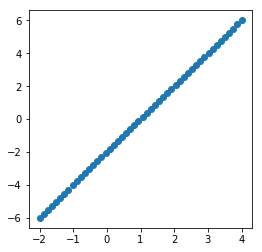

In [8]:
from IPython.display import display

# number of examples/observation
num_examples = 50

# create the toy data (x,y)
X = np.array([np.linspace(start=-2, stop=4, num=num_examples),
             np.linspace(start=-6, stop=6, num=num_examples)])
# display(X[0])

# plot the toy data
plt.figure(figsize=(4,4))
plt.scatter(X[0], X[1])
plt.show()

Add them with some random noise

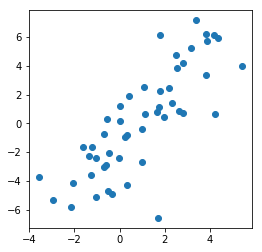

In [9]:
X += np.random.randn(2, num_examples)
plt.figure(figsize=(4,4))
plt.scatter(X[0], X[1])
plt.show()

## Goal

**To find a line that best fit to those data**

Find this red line below

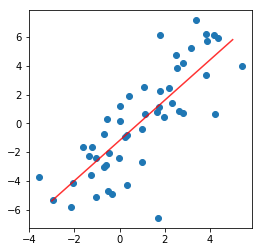

In [15]:
weights = np.polyfit(X[0], X[1], deg=1)
plt.figure(figsize=(4,4))
plt.scatter(X[0], X[1])
x_range = (-3, 5)
plt.plot(x_range, [weights[1] + a*weights[0] for a in x_range], "r", alpha=0.8)
plt.show()

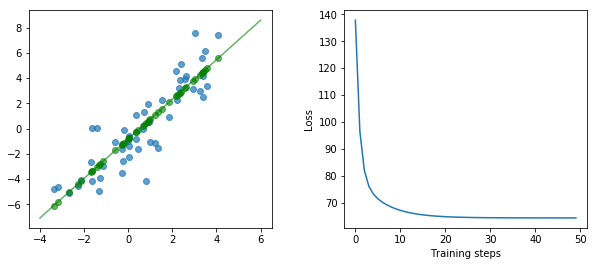

In [20]:
#@test {"output": "ignore"}
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

# Set up the data with a noisy linear relationship between X and Y.
num_examples = 50
X = np.array([np.linspace(-2, 4, num_examples), np.linspace(-6, 6, num_examples)])
# Add random noise (gaussian, mean 0, stdev 1)
X += np.random.randn(2, num_examples)
# Split into x and y
x, y = X
# Add the bias node which always has a value of 1
bias_with_x = np.array([(1., a) for a in x]).astype(np.float32)

# Keep track of the loss at each iteration so we can chart it later
losses = []
# How many iterations to run our training
training_steps = 50
# The learning rate. Also known has the step size. This changes how far
# we move down the gradient toward lower error at each step. Too large
# jumps risk inaccuracy, too small slow the learning.
learning_rate = 0.002

# In TensorFlow, we need to run everything in the context of a session.
with tf.Session() as sess:
    # Set up all the tensors.
    # Our input layer is the x value and the bias node.
    input = tf.constant(bias_with_x)
    # Our target is the y values. They need to be massaged to the right shape.
    target = tf.constant(np.transpose([y]).astype(np.float32))
    # Weights are a variable. They change every time through the loop.
    # Weights are initialized to random values (gaussian, mean 0, stdev 0.1)
    weights = tf.Variable(tf.random_normal([2, 1], 0, 0.1))

    # Initialize all the variables defined above.
    tf.global_variables_initializer().run()

    # Set up all operations that will run in the loop.
    # For all x values, generate our estimate on all y given our current
    # weights. So, this is computing y = w2 * x + w1 * bias
    yhat = tf.matmul(input, weights)
    # Compute the error, which is just the difference between our 
    # estimate of y and what y actually is.
    yerror = tf.subtract(yhat, target)
    # We are going to minimize the L2 loss. The L2 loss is the sum of the
    # squared error for all our estimates of y. This penalizes large errors
    # a lot, but small errors only a little.
    loss = tf.nn.l2_loss(yerror)

    # Perform gradient descent. 
    # This essentially just updates weights, like weights -= grads * learning_rate
    # using the partial derivative of the loss with respect to the
    # weights. It's the direction we want to go to move toward lower error.
    update_weights = tf.train.GradientDescentOptimizer(learning_rate).minimize(loss)

    # At this point, we've defined all our tensors and run our initialization
    # operations. We've also set up the operations that will repeatedly be run
    # inside the training loop. All the training loop is going to do is 
    # repeatedly call run, inducing the gradient descent operation, which has the effect of
    # repeatedly changing weights by a small amount in the direction (the
    # partial derivative or gradient) that will reduce the error (the L2 loss).
    for _ in range(training_steps):
        # Repeatedly run the operations, updating the TensorFlow variable.
        sess.run(update_weights)

        # Here, we're keeping a history of the losses to plot later
        # so we can see the change in loss as training progresses.
        losses.append(loss.eval())

    # Training is done, get the final values for the charts
    betas = weights.eval()
    yhat = yhat.eval()

# Show the results.
fig, (ax1, ax2) = plt.subplots(1, 2)
plt.subplots_adjust(wspace=.3)
fig.set_size_inches(10, 4)
ax1.scatter(x, y, alpha=.7)
ax1.scatter(x, np.transpose(yhat)[0], c="g", alpha=.6)
line_x_range = (-4, 6)
ax1.plot(line_x_range, [betas[0] + a * betas[1] for a in line_x_range], "g", alpha=0.6)
ax2.plot(range(0, training_steps), losses)
ax2.set_ylabel("Loss")
ax2.set_xlabel("Training steps")
plt.show()